In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/heart.csv")
data
# thalassemia is a  blood disorder involving lower-than-normal amounts of an oxygen-carrying protein.

,age,gender,person's resting blood pressure,cholestrol,resting electrocardiographic result,ecg,thalassemia,result
0,63,1,145,233,0,0,1,1
1,37,1,130,250,1,0,2,1
2,41,0,130,204,0,0,2,1
3,56,1,120,236,1,0,2,1
4,57,0,120,354,1,1,2,1
...,...,...,...,...,...,...,...,...
298,57,0,140,241,1,1,3,0
299,45,1,110,264,1,0,3,0
300,68,1,144,193,1,0,3,0
301,57,1,130,131,1,1,3,0


In [ ]:
#more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   303 non-null    int64
 1   gender                                303 non-null    int64
 2    person's resting blood pressure      303 non-null    int64
 3   cholestrol                            303 non-null    int64
 4    resting electrocardiographic result  303 non-null    int64
 5   ecg                                   303 non-null    int64
 6   thalassemia                           303 non-null    int64
 7   result                                303 non-null    int64
dtypes: int64(8)
memory usage: 19.1 KB


In [ ]:
data.describe()

,age,gender,person's resting blood pressure,cholestrol,resting electrocardiographic result,ecg,thalassemia,result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.528053,0.326733,2.313531,0.544554
std,9.082101,0.466011,17.538143,51.830751,0.525860,0.469794,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,140.000000,274.500000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,2.000000,1.000000,3.000000,1.000000


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# get the locations

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
# split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


# Initialize the LogisticRegression model
model = LogisticRegression()
model.fit(X_train, y_train) # Make sure to use X_train (capital X)

X_train shape: (227, 7)
X_test shape: (76, 7)
y_train shape: (227,)
y_test shape: (76,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RSE
rse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Calculate R2
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [ ]:
# Print the results
print("RSE - Train: {:.4f}, Test: {:.4f}".format(rse_train, rse_test))
print("R2 - Train: {:.4f}, Test: {:.4f}".format(r2_train, r2_test))

RSE - Train: 0.4967, Test: 0.5501
R2 - Train: 0.0077, Test: -0.2319


In [ ]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
X_train=st_x.fit_transform(X_train)
X_test=st_x.transform(X_test)

In [ ]:
# Calculate the correlation matrix, excluding non-numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()
correlation_matrix

,age,gender,person's resting blood pressure,cholestrol,resting electrocardiographic result,ecg,thalassemia,result
age,1.000000,-0.098447,0.279351,0.213678,-0.116211,0.096801,0.068001,-0.225439
gender,-0.098447,1.000000,-0.056769,-0.197912,-0.058196,0.141664,0.210041,-0.280937
person's resting blood pressure,0.279351,-0.056769,1.000000,0.123174,-0.114103,0.067616,0.062210,-0.144931
cholestrol,0.213678,-0.197912,0.123174,1.000000,-0.151040,0.067023,0.098803,-0.085239
resting electrocardiographic result,-0.116211,-0.058196,-0.114103,-0.151040,1.000000,-0.070733,-0.011981,0.137230
ecg,0.096801,0.141664,0.067616,0.067023,-0.070733,1.000000,0.206754,-0.436757
thalassemia,0.068001,0.210041,0.062210,0.098803,-0.011981,0.206754,1.000000,-0.344029
result,-0.225439,-0.280937,-0.144931,-0.085239,0.137230,-0.436757,-0.344029,1.000000


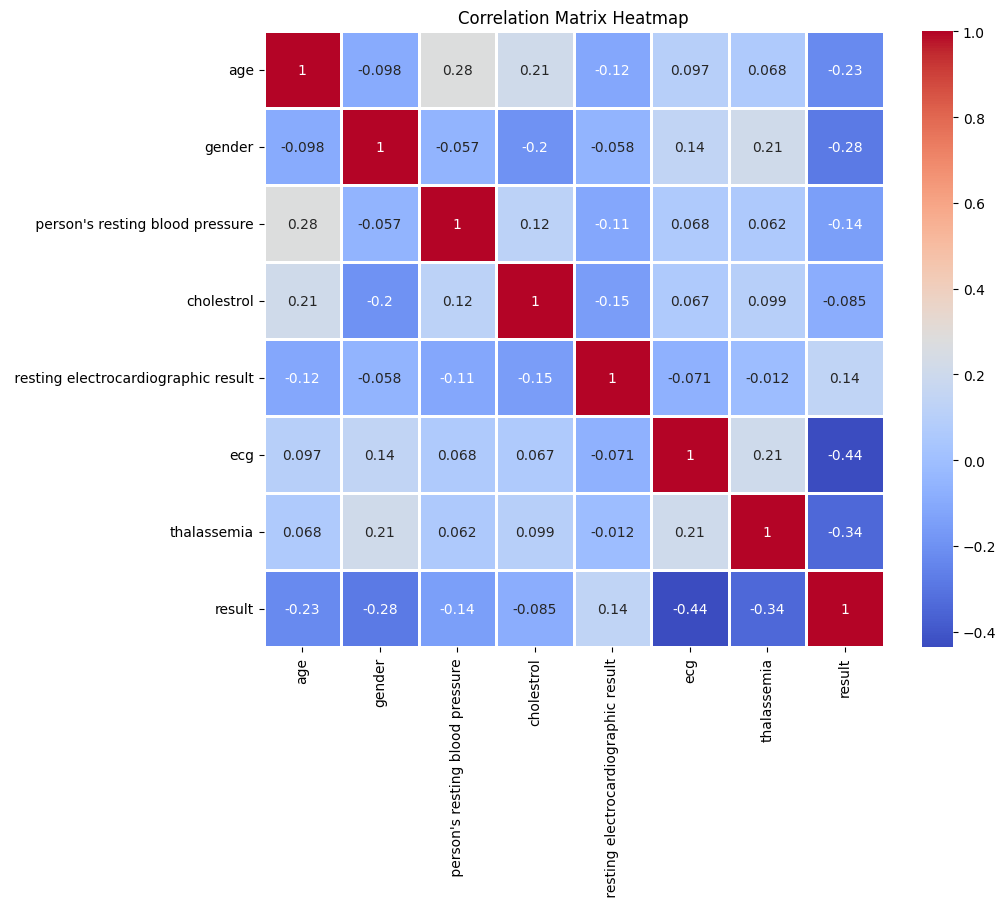

In [ ]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.9)
plt.title('Correlation Matrix Heatmap')
plt.show()

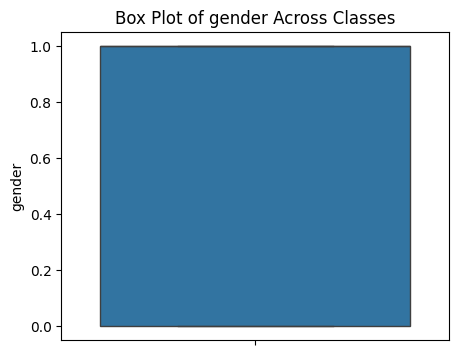

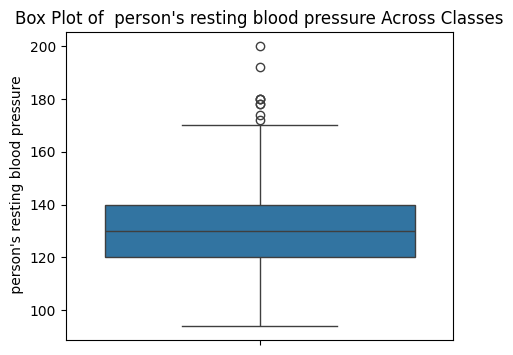

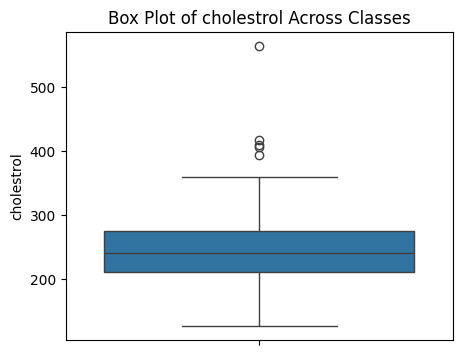

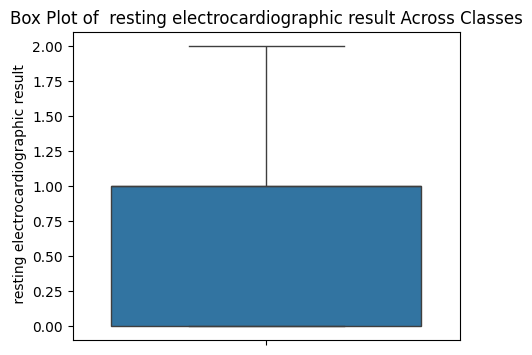

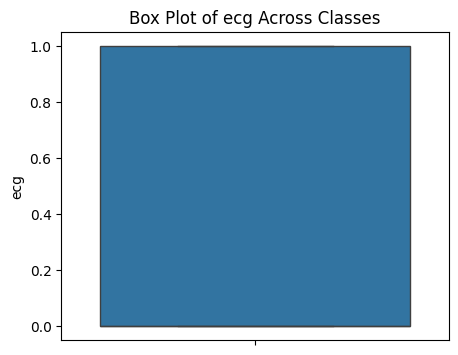

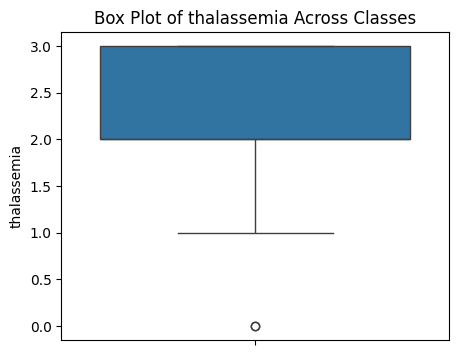

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create box plots for each feature, excluding 'Unnamed: 0'
for feature in df.columns[1:-1]:  # Exclude the target column and 'Unnamed: 0'
    if df[feature].dtype in ['int64', 'float64']: # Check if the feature is numerical
        plt.figure(figsize=(5, 4))
        sns.boxplot(y=feature, data=df) # Pass the dataframe to the 'data' parameter
        plt.title(f"Box Plot of {feature} Across Classes")
        plt.show()
    else:
        print(f"Skipping box plot for non-numerical feature: {feature}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
from sklearn.preprocessing import LabelEncoder

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Assuming 'y_train' contains non-numerical labels, encode them into numerical categories
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the classifier on the training data using the encoded labels
clf.fit(X_train, y_train_encoded)  # Use the encoded y_train

# Make predictions on the test data (you'll need to encode y_test as well before comparing)
y_pred = clf.predict(X_test)

# Encode y_test to match the encoded predictions
y_test_encoded = label_encoder.transform(y_test)  # Use the same label encoder

# Evaluate performance metrics using the encoded y_test
accuracy = accuracy_score(y_test_encoded, y_pred)  # Compare encoded labels
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test_encoded, y_pred)
mcc = matthews_corrcoef(y_test_encoded, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Kappa: {kappa}')
print(f'MCC: {mcc}')

Accuracy: 0.6973684210526315
Precision: 0.6985662686127083
Recall: 0.6973684210526315
F1 Score: 0.6978466799131279
Kappa: 0.3862359550561798
MCC: 0.3863735498317065


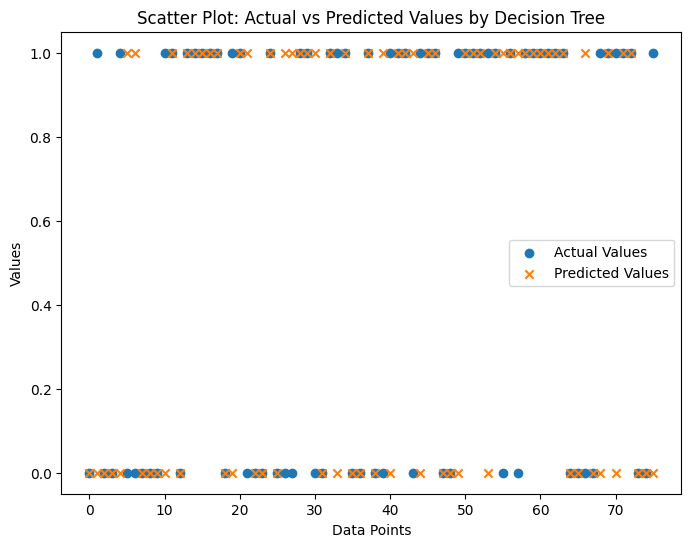

In [ ]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', marker='x')
plt.title("Scatter Plot: Actual vs Predicted Values by Decision Tree")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Kappa: {kappa}')
print(f'MCC: {mcc}')


Accuracy: 0.7368421052631579
Precision: 0.7393361452411518
Recall: 0.7368421052631579
F1 Score: 0.737579242223205
Kappa: 0.4681595521343598
MCC: 0.4688230646697802


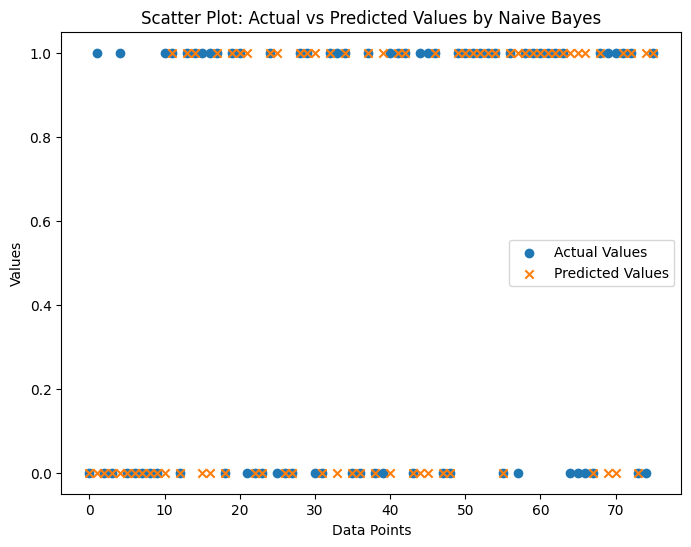

In [ ]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', marker='x')
plt.title("Scatter Plot: Actual vs Predicted Values by Naive Bayes")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Choose the number of neighbors (k)
k = 5

# Create a KNN classifier
clf = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Kappa: {kappa}')
print(f'MCC: {mcc}')

Accuracy: 0.7763157894736842
Precision: 0.7803728070175439
Recall: 0.7763157894736842
F1 Score: 0.7771360039701138
Kappa: 0.5495118549511855
MCC: 0.55125656389075


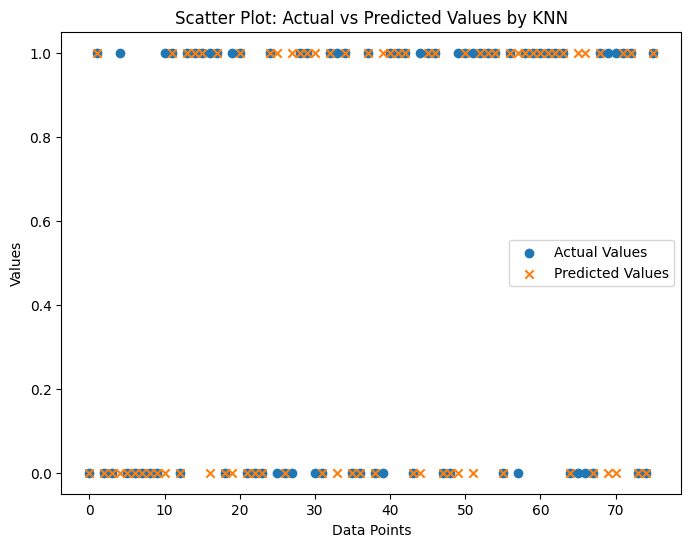

In [ ]:

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', marker='x')
plt.title("Scatter Plot: Actual vs Predicted Values by KNN")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
clf = LogisticRegression(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Kappa: {kappa}')
print(f'MCC: {mcc}')


Accuracy: 0.6973684210526315
Precision: 0.6953661327231121
Recall: 0.6973684210526315
F1 Score: 0.6952634394976205
Kappa: 0.3774928774928775
MCC: 0.3787434480790096


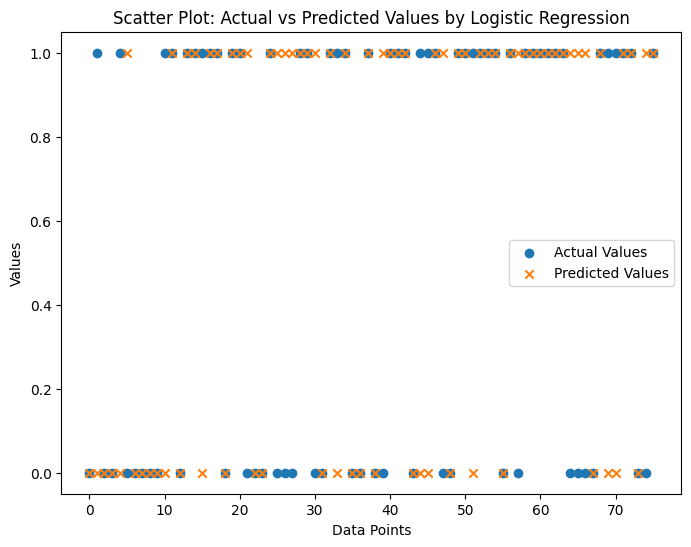

In [ ]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', marker='x')
plt.title("Scatter Plot: Actual vs Predicted Values by Logistic Regression")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.show()

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate and print metrics
models = [dt_model, nb_model, knn_model, lr_model]
predictions = [dt_predictions, nb_predictions, knn_predictions, lr_predictions]

for i, model in enumerate(models):
    predictions_i = predictions[i]
    print(f"Metrics for {model.__class__.__name__}:")
    print(f"Accuracy: {accuracy_score(y_test, predictions_i)}")
    print(f"Precision: {precision_score(y_test, predictions_i, average='weighted')}")
    print(f"Recall: {recall_score(y_test, predictions_i, average='weighted')}")
    print(f"F1 Score: {f1_score(y_test, predictions_i, average='weighted')}")
    print(f"Cohen's Kappa: {cohen_kappa_score(y_test, predictions_i)}")
    print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, predictions_i)}")
    print("\n")


Metrics for DecisionTreeClassifier:
Accuracy: 0.6973684210526315
Precision: 0.6985662686127083
Recall: 0.6973684210526315
F1 Score: 0.6978466799131279
Cohen's Kappa: 0.3862359550561798
Matthews Correlation Coefficient: 0.3863735498317065


Metrics for GaussianNB:
Accuracy: 0.7368421052631579
Precision: 0.7393361452411518
Recall: 0.7368421052631579
F1 Score: 0.737579242223205
Cohen's Kappa: 0.4681595521343598
Matthews Correlation Coefficient: 0.4688230646697802


Metrics for KNeighborsClassifier:
Accuracy: 0.7763157894736842
Precision: 0.7803728070175439
Recall: 0.7763157894736842
F1 Score: 0.7771360039701138
Cohen's Kappa: 0.5495118549511855
Matthews Correlation Coefficient: 0.55125656389075


Metrics for LogisticRegression:
Accuracy: 0.6973684210526315
Precision: 0.6953661327231121
Recall: 0.6973684210526315
F1 Score: 0.6952634394976205
Cohen's Kappa: 0.3774928774928775
Matthews Correlation Coefficient: 0.3787434480790096




In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_metrics(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate metrics
    total_samples = len(y_true)
    accuracy = sum([cm[i, i] for i in range(len(cm))]) / total_samples
    precision = precision_score(y_test, predictions_i, average='weighted')
    recall = recall_score(y_test, predictions_i, average='weighted')
    f1 = f1_score(y_test, predictions_i, average='weighted')
    kappa = cohen_kappa_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)

    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Weighted Precision': precision,
        'Weighted Recall': recall,
        'Weighted F1 Score': f1,
        'Kappa': kappa,
        'Matthews Correlation Coefficient': mcc
    }

# Example usage:
dt_metrics = calculate_metrics(y_test, dt_predictions)
nb_metrics = calculate_metrics(y_test, nb_predictions)
knn_metrics = calculate_metrics(y_test, knn_predictions)
lr_metrics = calculate_metrics(y_test, lr_predictions)

# Print or use the metrics as needed
print("\nMetrics for Decision Tree:")
print(dt_metrics)

print("\nMetrics for Naive Bayes:")
print(nb_metrics)

print("\nMetrics for KNN:")
print(knn_metrics)

print("\nMetrics for Logistic Regression:")
print(lr_metrics)


Metrics for Decision Tree:
{'Confusion Matrix': array([[22, 11],
       [12, 31]]), 'Accuracy': 0.6973684210526315, 'Weighted Precision': 0.6953661327231121, 'Weighted Recall': 0.6973684210526315, 'Weighted F1 Score': 0.6952634394976205, 'Kappa': 0.3862359550561798, 'Matthews Correlation Coefficient': 0.3863735498317065}

Metrics for Naive Bayes:
{'Confusion Matrix': array([[24,  9],
       [11, 32]]), 'Accuracy': 0.7368421052631579, 'Weighted Precision': 0.6953661327231121, 'Weighted Recall': 0.6973684210526315, 'Weighted F1 Score': 0.6952634394976205, 'Kappa': 0.4681595521343598, 'Matthews Correlation Coefficient': 0.4688230646697802}

Metrics for KNN:
{'Confusion Matrix': array([[26,  7],
       [10, 33]]), 'Accuracy': 0.7763157894736842, 'Weighted Precision': 0.6953661327231121, 'Weighted Recall': 0.6973684210526315, 'Weighted F1 Score': 0.6952634394976205, 'Kappa': 0.5495118549511855, 'Matthews Correlation Coefficient': 0.55125656389075}

Metrics for Logistic Regression:
{'Confus

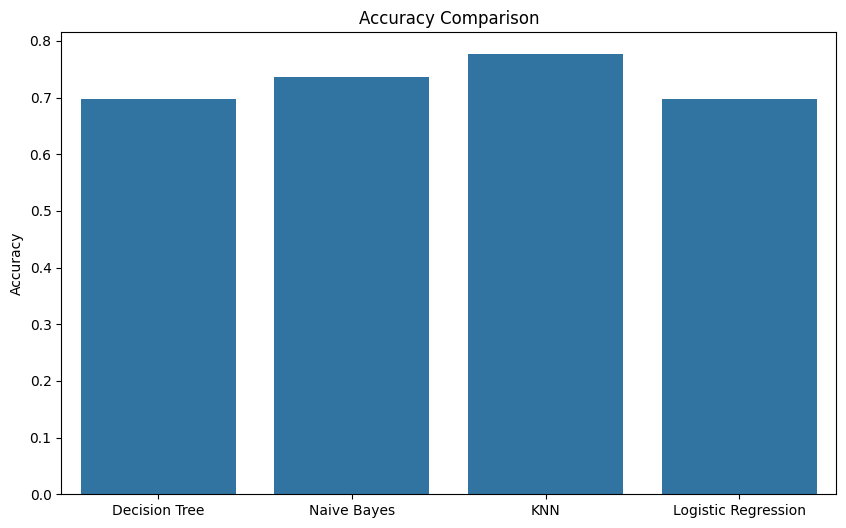

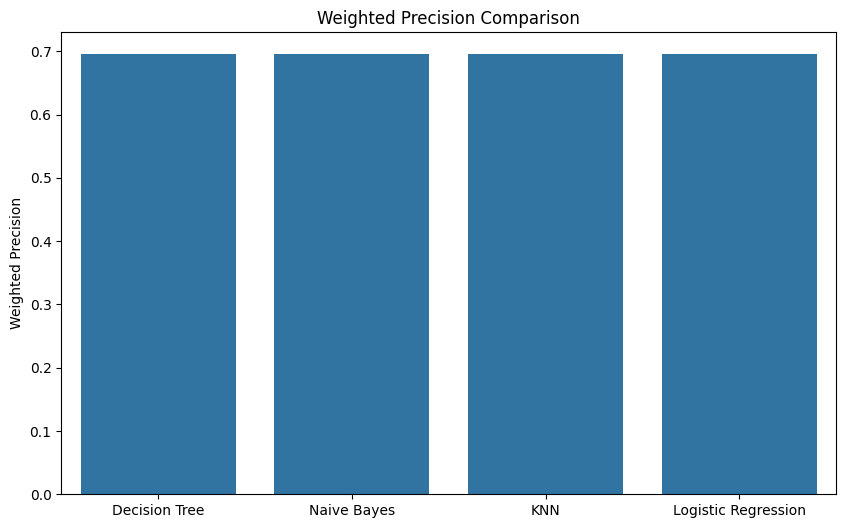

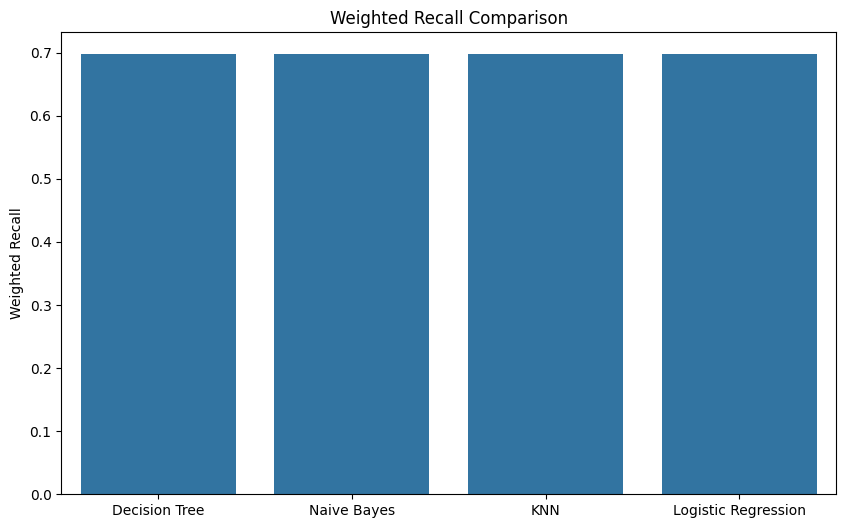

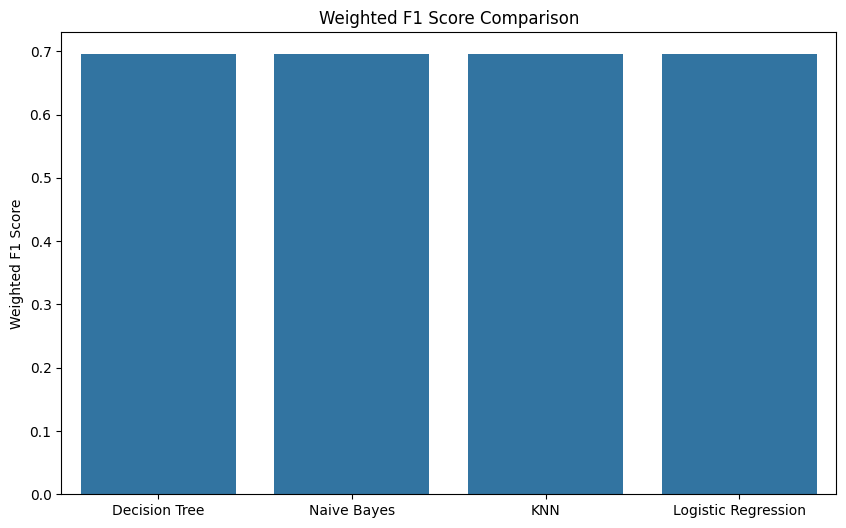

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract metrics for each model
metrics_list = [dt_metrics, nb_metrics, knn_metrics, lr_metrics]
model_names = ['Decision Tree', 'Naive Bayes', 'KNN', 'Logistic Regression']
metric_names = ['Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1 Score']

# Create a bar plot for each metric
for metric in metric_names:
    values = [metrics[metric] for metrics in metrics_list]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=model_names, y=values)
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.show()